## Algerian Forest Fire Prediction Using Logistic Regression

### Logistric Regression
Logistic Regresison is a statistical method used to predict the likelihood of a certain outcome, such as whether a customer will purchase a product or a student will pass.<br>
It is a type of binary classification algorithm, which means that it is used to seperate twwo groups (e.g. in a class, Group1: Those who will pass the exam and Group2: those who will fail the exam).<br>
Logistic Regression is widely used in various fields such as finance, marketing, medicine etc.

### Problem Statement
- The dataset includes data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
- We need to Predict whether the Algerian forest will catch fire or not based on the dependent features.
- Check the performance of the model.
- Create a new Logistic model but with imbalanced data and check the performance of the same.

### Data Collection
- This data set is collected from UCI Machine Learning Repository.

### 1. Importing Required Packages and Perform basic Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Sachin Dev\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
import warnings
warnings.filterwarnings('ignore')

##### Read the data 

In [5]:
data = pd.read_csv('Algerian_forest_fires_dataset.csv',header=1)
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [6]:
data.iloc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


##### Drop rows with index 122 and 123

In [7]:
data.drop(labels=[122,123],axis=0,inplace=True)
data.iloc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


##### Show top and bottom 5 rows

In [8]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [9]:
data.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


##### Shape of the data

In [10]:
data.shape

(244, 14)

So we have 245 rows and 14 features in the dataset

##### Check duplicate values

In [36]:
data.duplicated().sum()

0

##### Check null values and data types of each data

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 28.6+ KB


Classes column have 1 null value

##### checking null vaue in Classes column

In [15]:
data[data['Classes  '].isnull() == True]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


We will have to replace this with mode of the column

##### check columns in the dataset

In [16]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

As we can see that there are spaces in the names of the columns we need to change hte names or remove spaces from the columns name

##### Check values in few columns

In [17]:
data['Classes  '].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

We need only 2 unique values fire or not fire and later will encode it to 0 and 1

In [18]:
data[data['DC'] == '14.6 9']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


There is value in DC column '14.6 9' we need to remove space from this before changing the column to float data type 

In [19]:
data.head(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire


In [20]:
data.iloc[165]['FWI']

'fire   '

similarly FWI column contains float values but there is one value fire in it<br>
will replace fire with the mode

**Observations Section 1**
- Dataset have 245 rows and 14 Columns
- There are no duplicate values.
- We will need to change the data types of the columns during data cleaning.
- For data cleaning:- 
    - Change the names of few columns or remove spaces from the column names
    - We need only 2 values in Classes column i.e. 'fire' or 'not fire' so need to remove spaces from Classes column and then encode it to 1 and 0.
    - Classes column have 1 Null Value, we will change it to mode of the Classes feature.
    - DC column have spaces in a value we need to replace that also before changing the datatypes.
    - Similarly FWI should contain float values but have a value 'fire' so will replace it with the mode.
- We can add a column in the dataset as Region to represent 'Bejaia' and 'Sidi Bel-abbes' and then encode this also to 1 and 0.
- We can remove year column as the data is present for year 2012 only.

### 2. Data Cleaning

##### 2.1 check the names of the columns and clean them 

In [21]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [23]:
data.columns = [feature.strip() for feature in data.columns]
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

##### 2.2 Clean the Classes column

In [24]:
data['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [25]:
data['Classes'] = data['Classes'].str.strip()
data['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

###### 2.3 Remove nan value from Classes and replace it with mode 

In [27]:
data['Classes'].fillna(data['Classes'].mode()[0],inplace=True)
data['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

##### 2.4 Clean DC  and FWI column

In [28]:
data[data['DC'] == '14.6 9']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,fire


In [29]:
data['DC'].replace('14.6 9','14.69',inplace=True)

In [30]:
data[data['DC'] == '14.6 9']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [31]:
data[data['DC'] == '14.69']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,fire,fire


In [32]:
data.iloc[165]['FWI']

'fire   '

In [33]:
data['FWI'].replace('fire   ',data['FWI'].mode()[0],inplace=True)

In [34]:
data.iloc[165]['FWI']

'0.4'

##### 2.5 Remove year column 

In [39]:
data.drop('year',axis=1,inplace=True)

In [40]:
data.head(3)

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire


##### 2.6 Encode Classes column

In [42]:
##### not fire = 0 and fire = 1
data['Classes'] = data['Classes'].map({'not fire':0,'fire':1})

In [44]:
data.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,02,06,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0
2,03,06,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,04,06,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0
4,05,06,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0


##### 2.7 Add region column: 0 for Bejaia and 1 for Sidi-Bel Abbes

In [46]:
data['Region'] = 0
data['Region'].iloc[122:] = 1

In [48]:
data.sample(5)

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
40,11,07,33,76,14,0,81.1,8.1,18.7,2.6,8.1,2.2,0,0
9,10,06,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,0,0
29,30,06,33,50,14,0,88.7,22.9,92.8,7.2,28.3,12.9,1,0
174,21,07,36,29,18,0,93.9,39.6,80.6,18.5,39.5,30,1,1
47,18,07,31,68,14,0,85.4,12.1,43.1,4.6,14.2,6,1,0


##### 2.8 Change the datatypes of the columns

In [50]:
data.dtypes

day            object
month          object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes         int64
Region          int64
dtype: object

In [51]:
for feature in ['day', 'month', 'Temperature', 'RH', 'Ws']:
    data[feature] = data[feature].astype(str).astype(int)

In [52]:
for feature in ['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']:
    data[feature] = data[feature].astype(str).astype(float)

In [53]:
data.dtypes

day              int32
month            int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region           int64
dtype: object

**Observations Section 2**
- Changed the datatypes of the columns.
- Encoded Classes column - 0 means not fire and 1 means fire.
- Added Region column - 0 for Bejaia and 1 for Sidi-Bel Abbes.
- Removed Year column as the data is only present for year 2012.
- Removed spaces from the column names and cleaned Classes,FWI and DC columns.
- We can do EDA now.

### 3. Exploring the Data and Analysis of Data

##### 3.1 Description of the data

In [55]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288484,47.619393,6.9,13.275,33.10,68.150,220.4
ISI,244.0,4.774180,4.175318,0.0,1.400,3.50,7.300,19.0


- Seems like there can be Outliers in RH, Rain, DMC, ISI, BUI and FWI columns.<br>
- As we know the every column is either int or float type so we don't need to convert dataset to numerical and categorical cols.

#### 3.2 Univariate Analysis

In [57]:
##### Check count of the Classes as this is our target feature.
data['Classes'].value_counts()

1    138
0    106
Name: Classes, dtype: int64

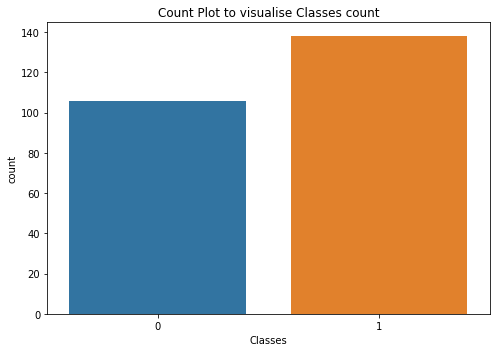

In [66]:
plt.figure(figsize=(7,5))
plt.title("Count Plot to visualise Classes count")
sns.countplot(x='Classes',data=data)
plt.tight_layout()
plt.show()

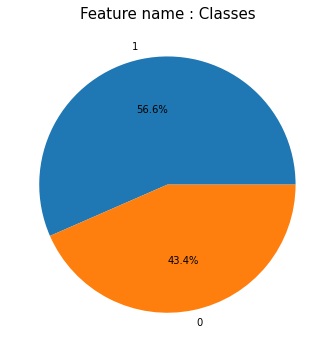

In [70]:
plt.figure(figsize=(7,5))
data.value_counts('Classes').plot(kind="pie",autopct = '%1.1f%%')
plt.title ("Feature name : Classes", fontsize = 15)
plt.tight_layout()
plt.show()

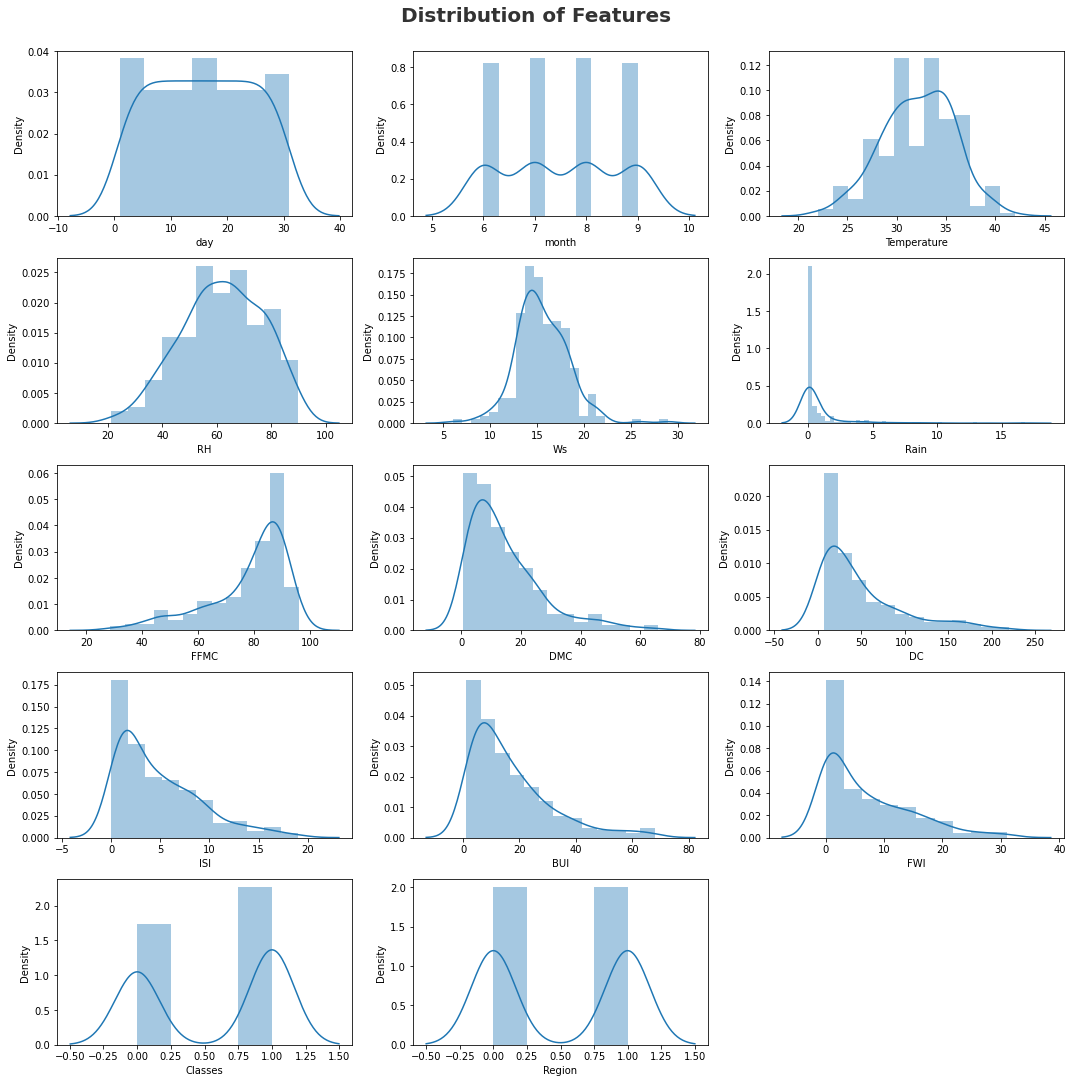

In [72]:
##### Check Distribution of the Features

plt.figure(figsize=(15,15))
plt.suptitle("Distribution of Features",fontsize=20,fontweight='bold',alpha=0.8,y=1)

for i in range(len(data.columns)):
    plt.subplot(5,3,i+1)
    sns.distplot(x=data[data.columns[i]])
    plt.xlabel(data.columns[i])
    plt.tight_layout()

- Rain, DC, DMC, ISI, BUI and FWI are right skewed which means there are outliers in these columns.
- FFMC is left skewed.
- Ws and RH also seems to be slighty skewed.

##### Scatter plot to check trend in each feature

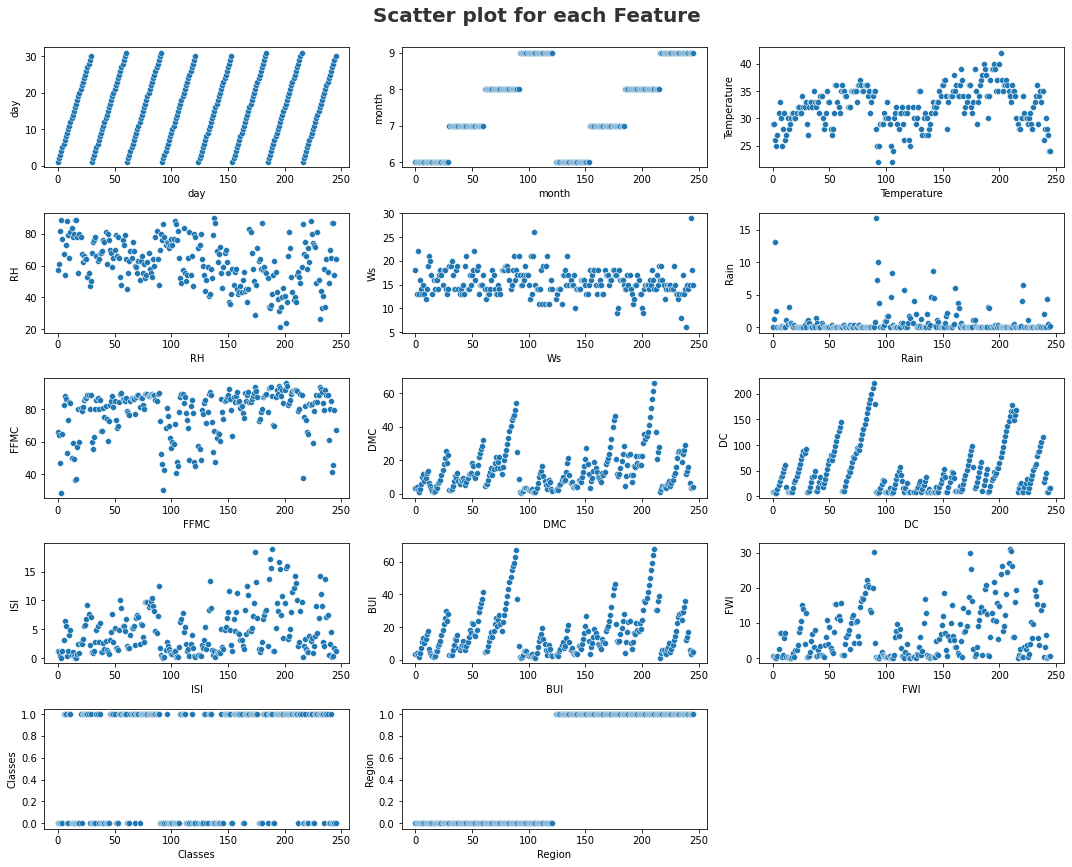

In [89]:
plt.figure(figsize=(15,12))
plt.suptitle("Scatter plot for each Feature", fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i in range(len(data.columns)):
    plt.subplot(5,3,i+1)
    sns.scatterplot(x=data.index, y=data.columns[i], data=data)
    plt.xlabel(data.columns[i])
    plt.tight_layout()

#### 3.3 Check Outliers using Boxplot

<AxesSubplot: >

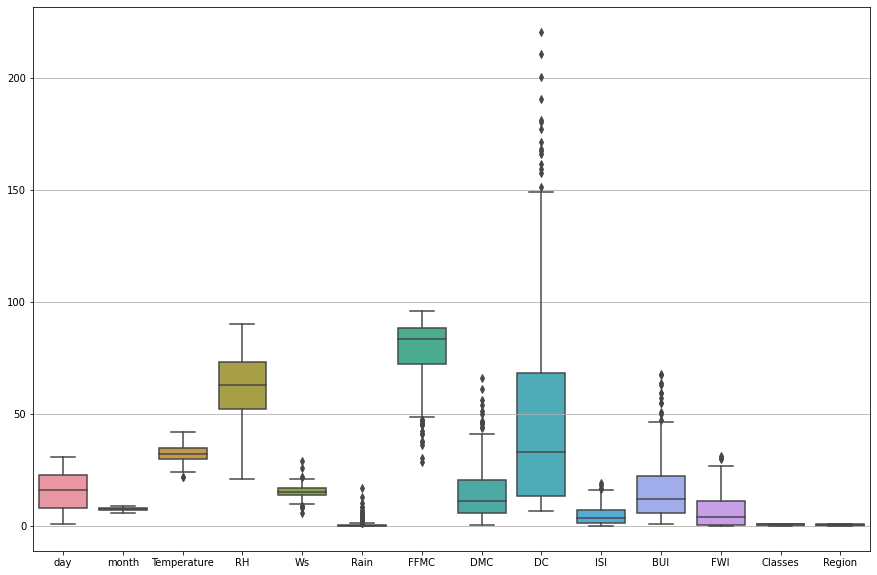

In [75]:
plt.figure(figsize=(15,10))
plt.grid(True)
sns.boxplot(data=data[data.columns],orient='v')

- As we can see we have Outliers in Ws, Rain, FFMC, DMC, DC, ISI, BUI and FWI columns.

#### 3.4 Bivariate Analysis

In [86]:
for feature in data.columns:
    print(f"{feature} has {len(data[feature].unique())} values")

day has 31 values
month has 4 values
Temperature has 19 values
RH has 62 values
Ws has 18 values
Rain has 39 values
FFMC has 173 values
DMC has 166 values
DC has 198 values
ISI has 106 values
BUI has 174 values
FWI has 125 values
Classes has 2 values
Region has 2 values


##### check the relationship of various features with Classes

<AxesSubplot: xlabel='Temperature', ylabel='count'>

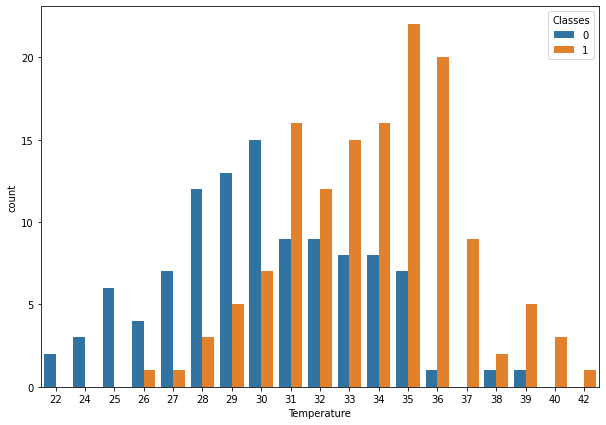

In [91]:
plt.figure(figsize=(10,7))
sns.countplot(data=data,x='Temperature',hue='Classes')

- As the temperature increases there are more chances of forest catching the fire.
- if temperature is less than 26, there is no fire.

<AxesSubplot: xlabel='Ws', ylabel='count'>

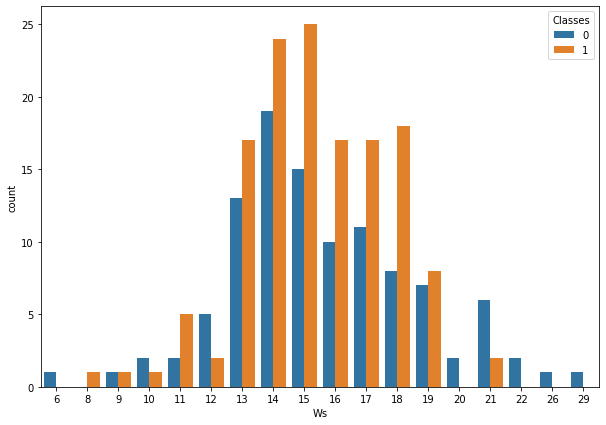

In [94]:
plt.figure(figsize=(10,7))
sns.countplot(data=data,x='Ws',hue='Classes')

- Windspeed b/w 13 to 18 a lot of chances of the fire

<AxesSubplot: xlabel='month', ylabel='count'>

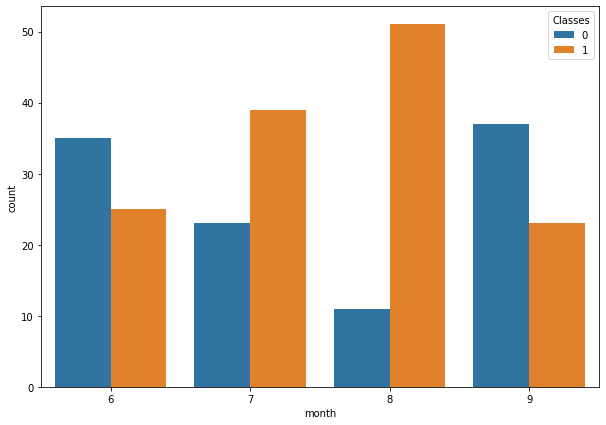

In [97]:
plt.figure(figsize=(10,7))
sns.countplot(data=data,x='month',hue='Classes')

- August month have most cases of fire followed by July.

Text(0, 0.5, 'Temperature')

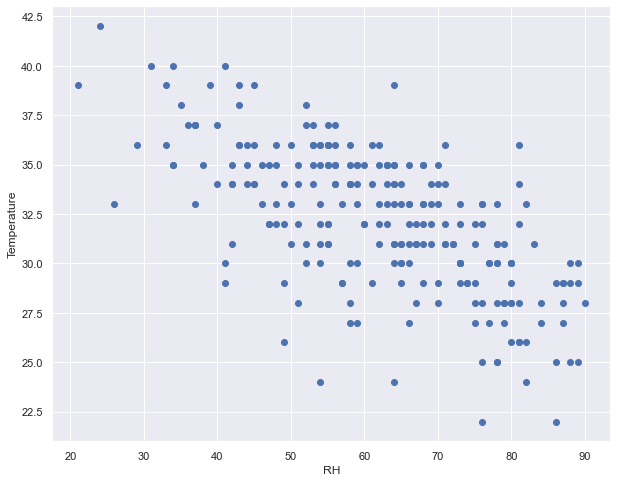

In [99]:
#### Relationship b/w temperature and humiditty
sns.set(rc={'figure.figsize':(10,8)})
plt.scatter(data['RH'], data['Temperature'])
plt.xlabel('RH')
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

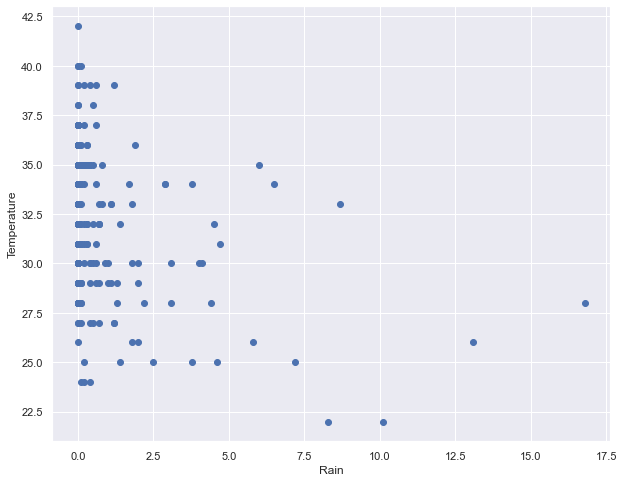

In [101]:
#### Relationship b/w temperature and rain
sns.set(rc={'figure.figsize':(10,8)})
plt.scatter(data['Rain'], data['Temperature'])
plt.xlabel('Rain')
plt.ylabel('Temperature')

#### 3.5 Multivariate Analysis

###### Check Correlation between features

In [103]:
data.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527930,0.177727,0.517229,0.350909,0.201784,4.662229e-16
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.084119,0.022333,-9.586232e-17
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.558800,0.518119,2.734961e-01
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.570483,-0.435023,-4.064239e-01
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.029001,-0.066529,-1.768290e-01
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.322810,-0.379449,-4.108006e-02
FFMC,2.240321e-01,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.686342,0.770114,2.246798e-01
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.874924,0.584188,1.910937e-01
DC,5.279300e-01,1.276691e-01,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.740175,0.507132,-8.148217e-02
ISI,1.777266e-01,6.168011e-02,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.908054,0.735511,2.684206e-01


<AxesSubplot: >

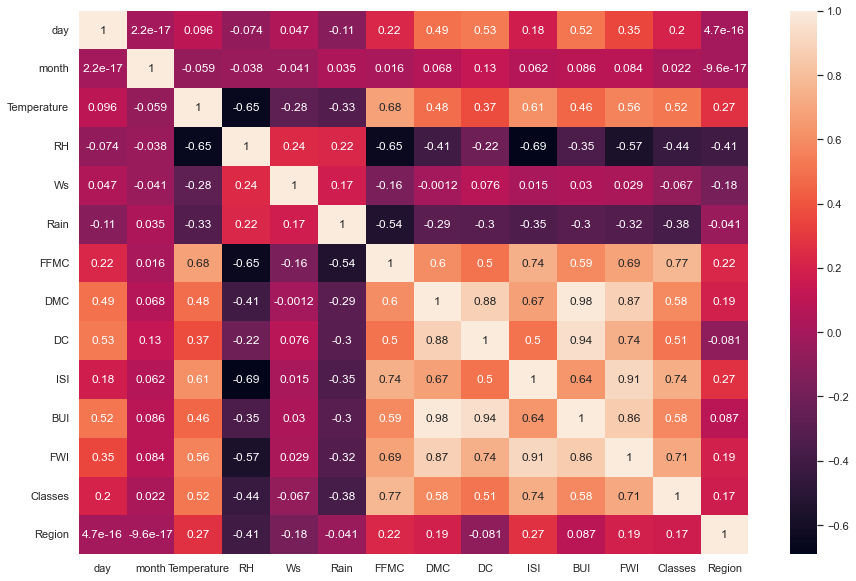

In [104]:
##### HEATMAP to check correlation
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data.corr(),annot=True)

- FFMC,ISI and FWI have strong positive correlation with Classes.
- RH,Ws, and Rain are negatively correlated with Classes.
- FWI is highly correlated with DMC,ISI,DC and BUI.
- Temperatire has positive correlation with FFMC,ISI but has -ve correaltion with RH and Rain
- DMC and BUI are highly correlated so if we can drop any one of them for feature selection.

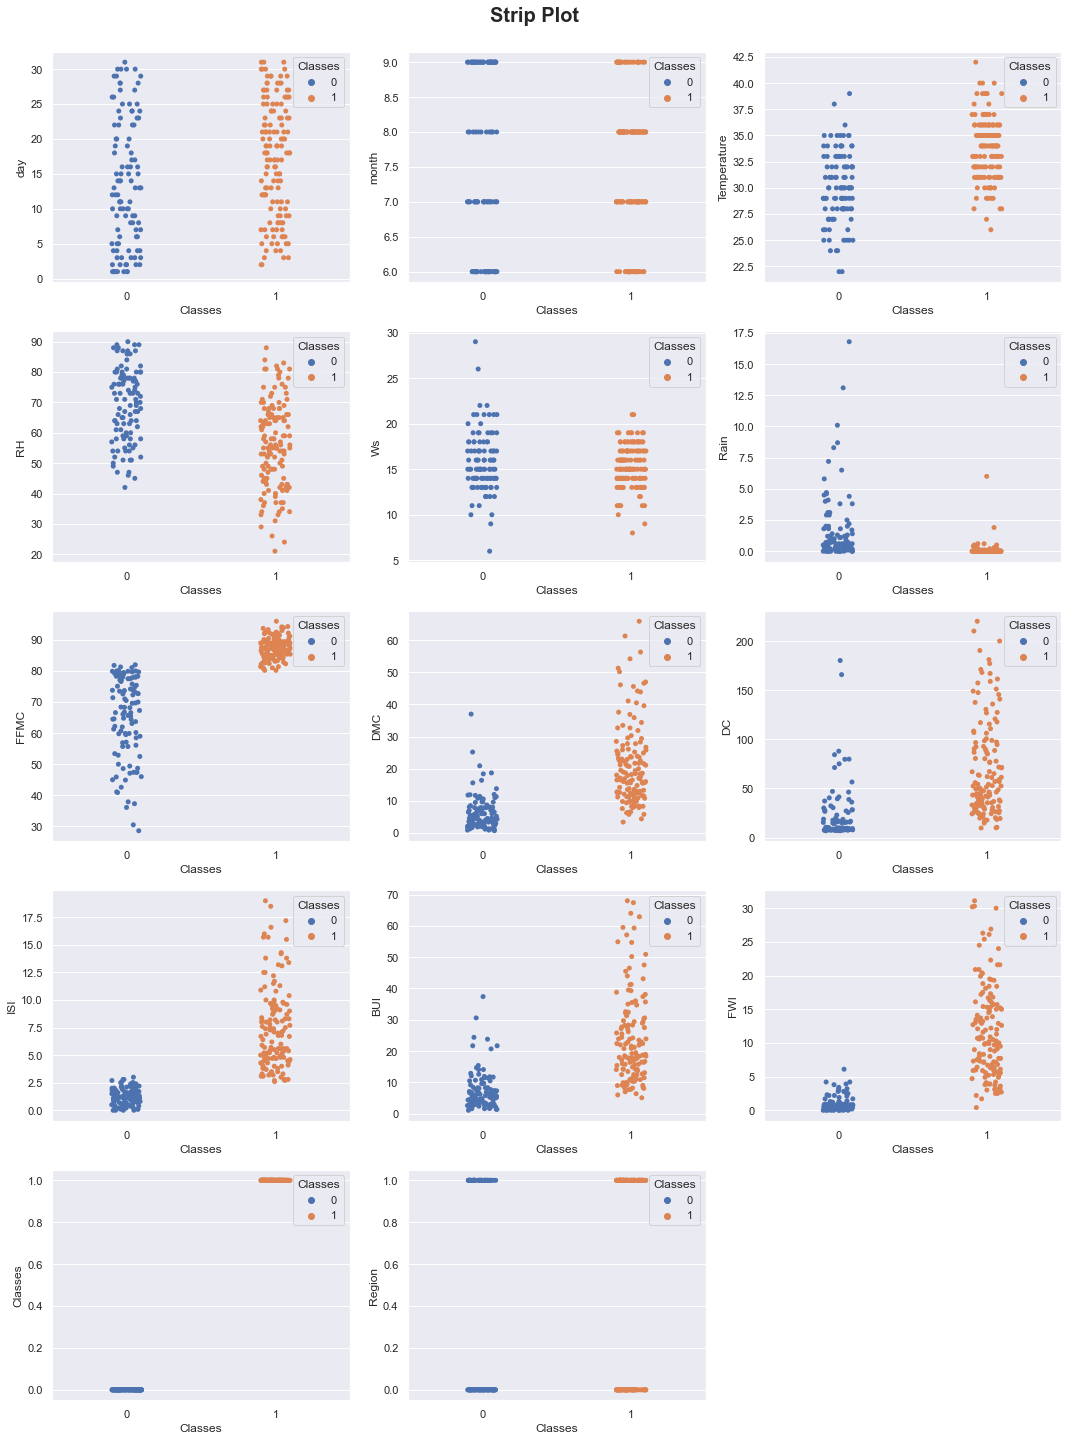

In [107]:
plt.figure(figsize=(15, 20))
plt.suptitle('Strip Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(len(data.columns)):
    plt.subplot(5, 3, i+1)
    sns.stripplot(y=data.columns[i], x='Classes', data=data,hue='Classes')
    plt.tight_layout()

### 4. Building the Model

##### 4.1 import sklearn packages for logistic regression

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

##### 4..2 Divide data into dependent and independent columns

In [108]:
x = data.drop(columns= ['Classes'])
y = data['Classes']

In [109]:
x.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [110]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classes, dtype: int64

##### 4.2 Feature Scaling

In [113]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(x)

In [116]:
X_scaled

array([[-1.67527776, -1.35052592, -0.87473544, ..., -0.93573985,
        -0.87686413, -1.        ],
       [-1.56173115, -1.35052592, -0.87473544, ..., -0.90046818,
        -0.89033736, -1.        ],
       [-1.44818455, -1.35052592, -1.70200461, ..., -0.98512017,
        -0.93075704, -1.        ],
       ...,
       [ 1.39048054,  1.35052592, -1.42624822, ..., -0.93573985,
        -0.91728381,  1.        ],
       [ 1.50402714,  1.35052592, -2.25351739, ..., -0.8158162 ,
        -0.84991768,  1.        ],
       [ 1.61757374,  1.35052592, -2.25351739, ..., -0.83697919,
        -0.87686413,  1.        ]])

##### 4.3 Train the data

In [120]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size=0.25,random_state=355)

In [121]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

##### 4.4 Saving or Picking the model

In [122]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)


### 5 Performance of the model

In [123]:
y_pred = log_reg.predict(x_test)

##### 5.1 Accuracy

In [124]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9836065573770492

##### 5.2 Confusion Matrix

In [125]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[27,  0],
       [ 1, 33]], dtype=int64)

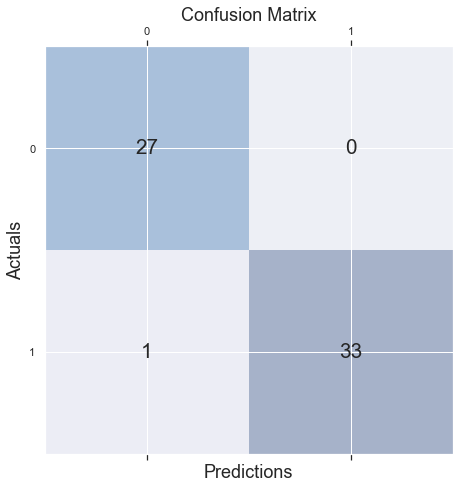

In [126]:

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i,s=conf_mat[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [127]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [128]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9836065573770492

##### 5.3 Precision

In [129]:
Precision = true_positive/(true_positive+false_positive)
Precision

1.0

##### 5.4 Recall

In [130]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.9642857142857143

In [ ]:
##### 5.5 F1 Score